In [44]:
# Step 1: Importing Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [86]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [38]:
df=pd.read_csv("/content/OCD Patient Dataset_ Demographics & Clinical Data.csv")

In [39]:
# Step 2: Initial Data Exploration
print(df.head())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [40]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [41]:
# Check for missing values
print(df.isnull().sum())

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [47]:
# Step 3: Descriptive Statistics

print(df.describe())

        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                     9.00000  
50%                    20.0

In [21]:
df['Medications'].fillna('Not Specified', inplace=True)

<ipython-input-21-e0236a886cda>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medications'].fillna('Not Specified', inplace=True)


In [48]:
# Summary statistics for categorical columns

print(df.describe(include=['object']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1252                  1500           1500   
unique                  4                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1114  
unique               5                    2                 2               3  
top            Washing                

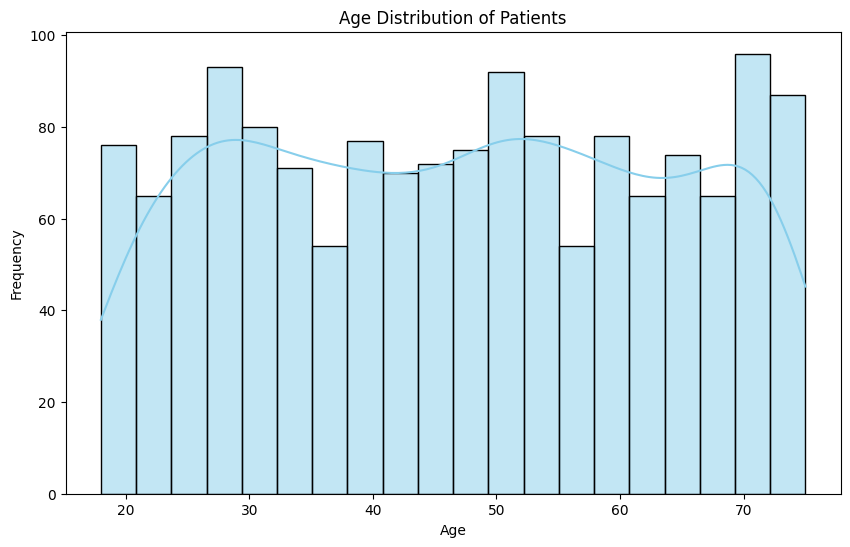

In [50]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True,color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')
plt.show()

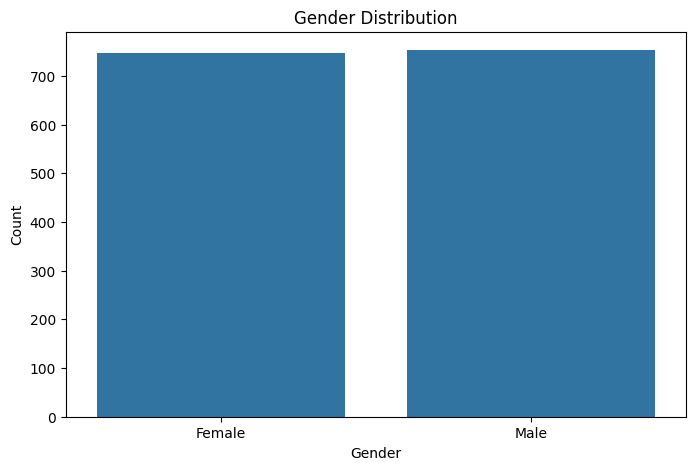

In [55]:
# Gender distribution
plt.figure(figsize=(8, 5))                     # Set the figure size
sns.countplot(x='Gender', data=df)             # Plot the countplot using seaborn
plt.title('Gender Distribution')               # Add title
plt.xlabel('Gender')                           # X-axis label
plt.ylabel('Count')                            # Y-axis label
plt.savefig('gender_distribution.png')         # Save plot as PNG
plt.show()                                    # Close the plot to avoid overlap in next plots



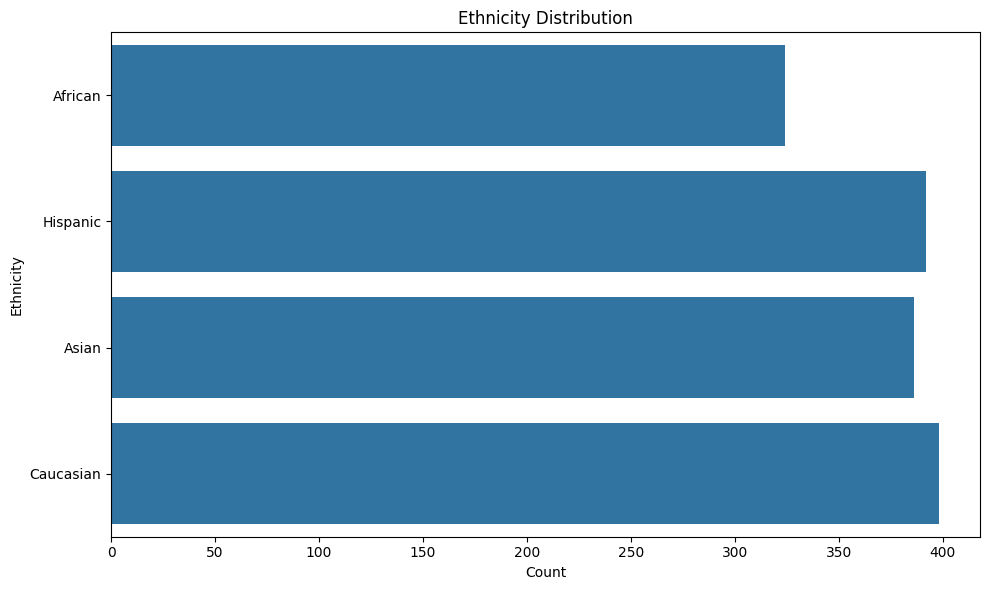

In [52]:
# Ethnicity distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.savefig('ethnicity_distribution.png')
plt.show()

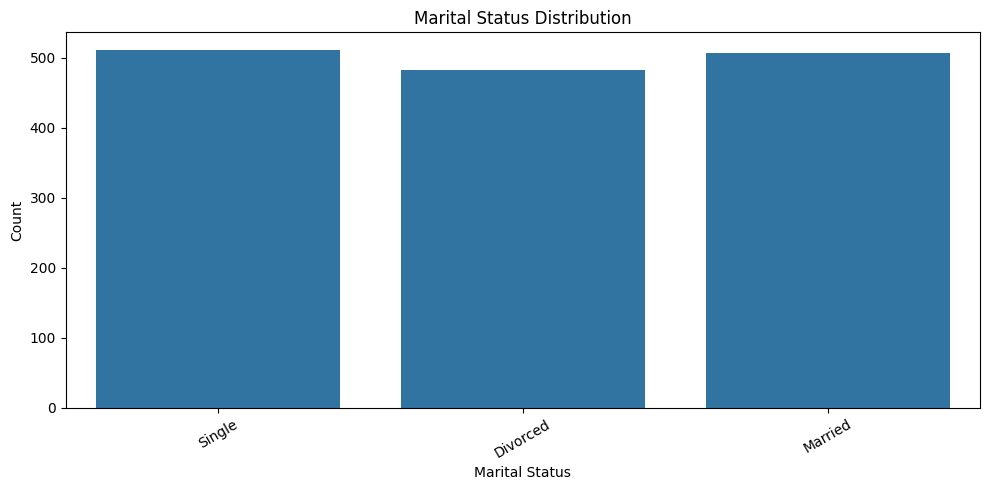

In [56]:
# Marital Status distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('marital_status_distribution.png')
plt.show()

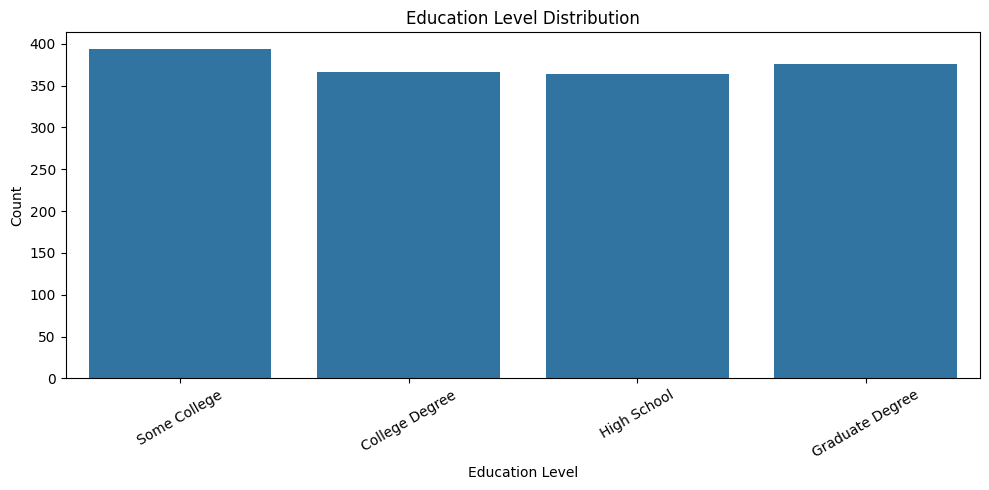

In [57]:
# Education Level distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Education Level', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('education_level_distribution.png')
plt.show()

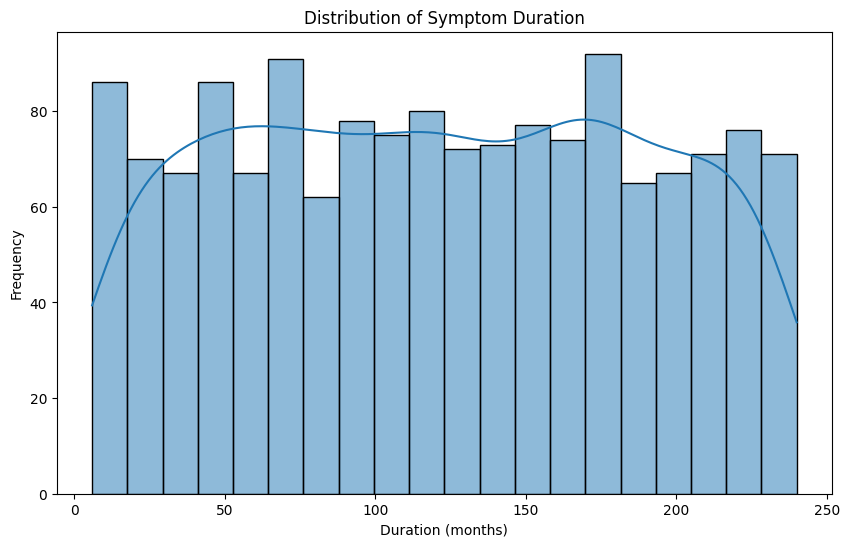

In [59]:
# Step 5: Clinical Data Analysis
# Distribution of symptom duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.savefig('symptom_duration_distribution.png')
plt.show()


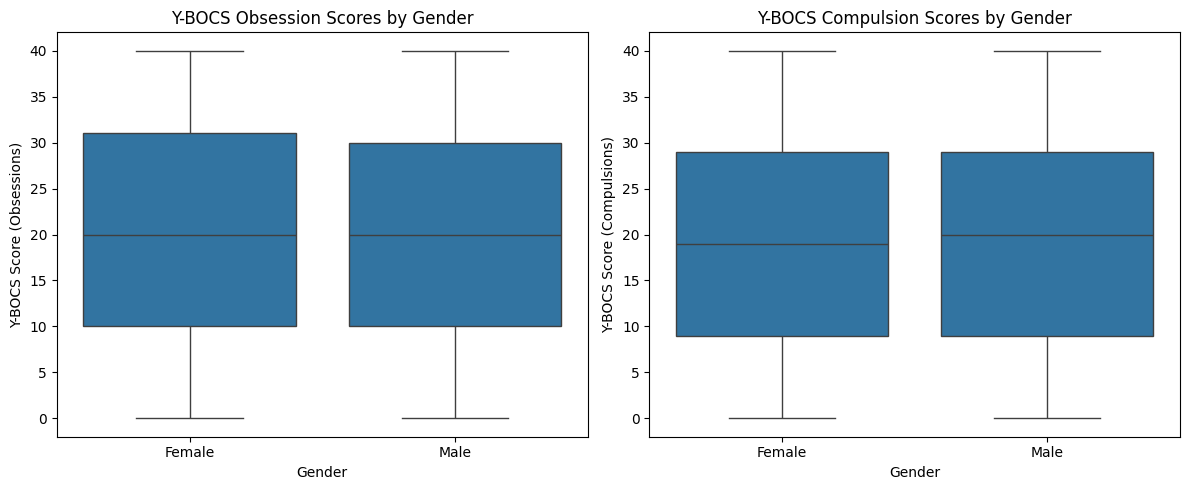

In [63]:
# Boxplot of Y-BOCS Scores by Gender
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Y-BOCS Score (Compulsions)', data=df)
plt.title('Y-BOCS Compulsion Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.tight_layout()
plt.savefig('ybocs_scores_by_gender.png')
plt.show()


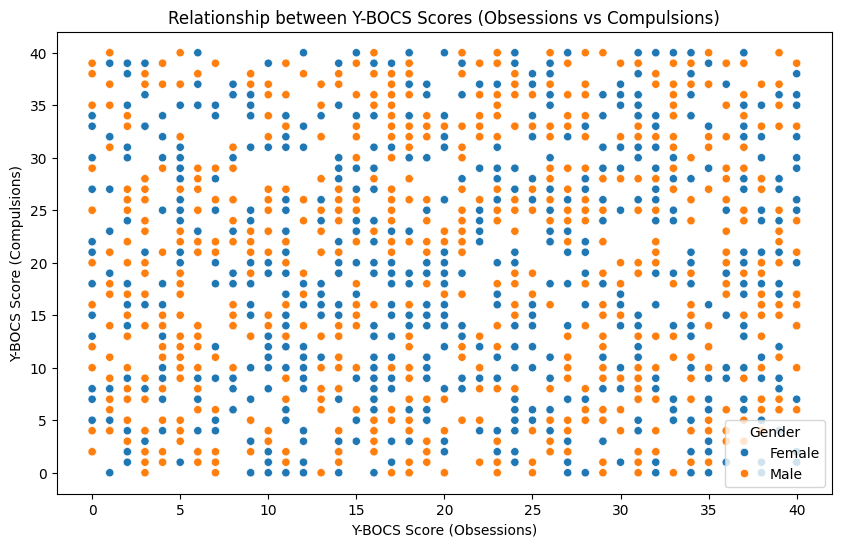

In [64]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Gender', data=df)
plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.savefig('ybocs_relationship.png')
plt.show()

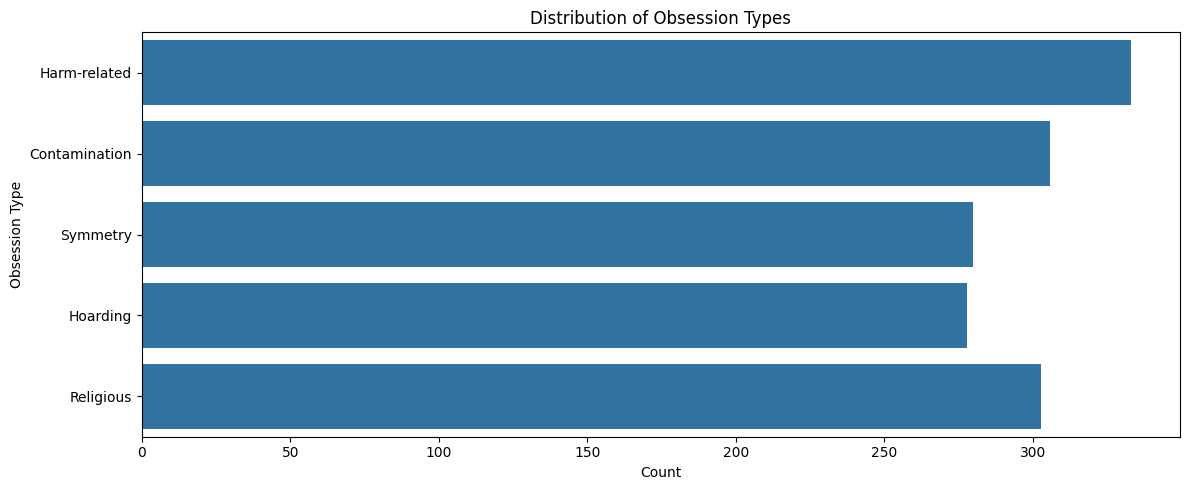

In [65]:
# Distribution of Obsession Types
plt.figure(figsize=(12, 5))
sns.countplot(y='Obsession Type', data=df)
plt.title('Distribution of Obsession Types')
plt.xlabel('Count')
plt.ylabel('Obsession Type')
plt.tight_layout()
plt.savefig('obsession_types.png')
plt.show()

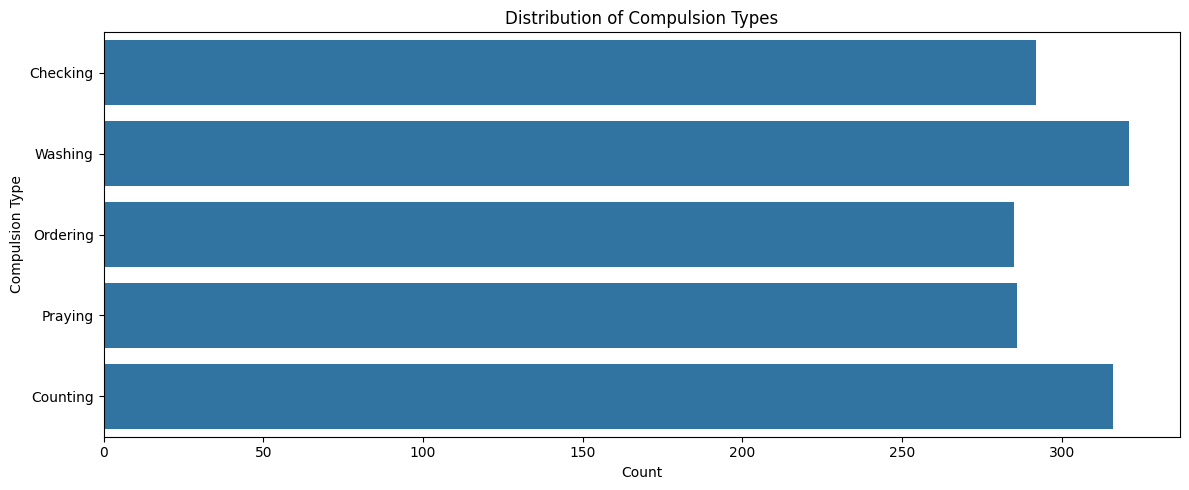

In [66]:
# Distribution of Compulsion Types
plt.figure(figsize=(12, 5))
sns.countplot(y='Compulsion Type', data=df)
plt.title('Distribution of Compulsion Types')
plt.xlabel('Count')
plt.ylabel('Compulsion Type')
plt.tight_layout()
plt.savefig('compulsion_types.png')
plt.show()


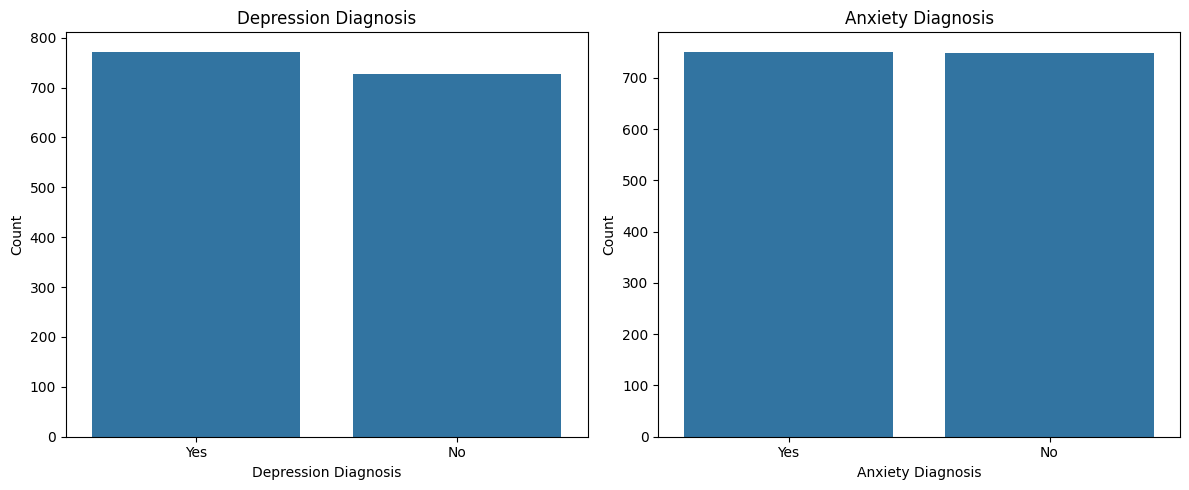

In [68]:
# Depression and Anxiety Diagnosis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Depression Diagnosis', data=df)
plt.title('Depression Diagnosis')
plt.xlabel('Depression Diagnosis')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Anxiety Diagnosis', data=df)
plt.title('Anxiety Diagnosis')
plt.xlabel('Anxiety Diagnosis')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('depression_anxiety_diagnosis.png')
plt.show()

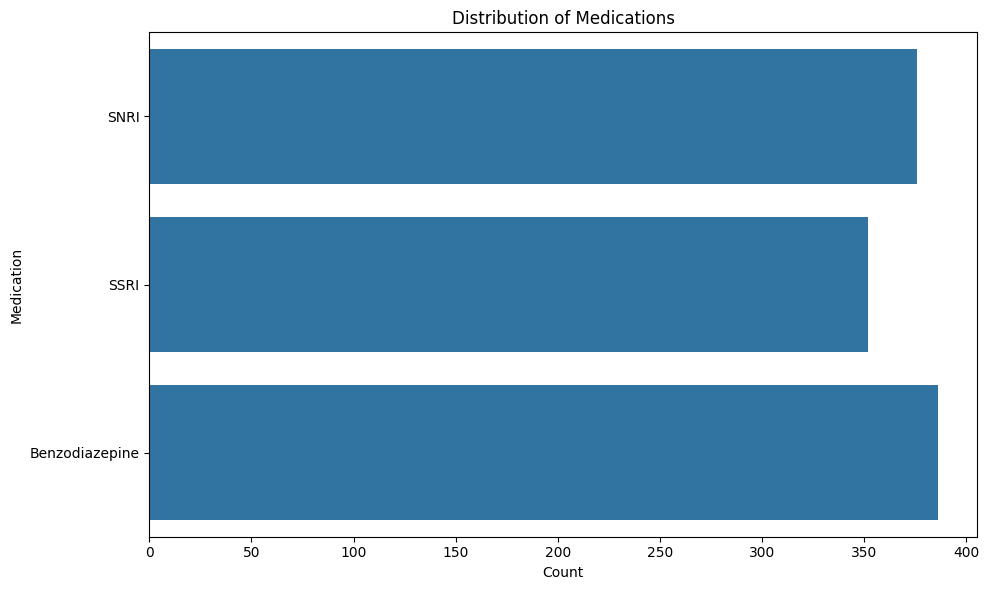

In [70]:
# Medications
plt.figure(figsize=(10, 6))
sns.countplot(y='Medications', data=df)
plt.title('Distribution of Medications')
plt.xlabel('Count')
plt.ylabel('Medication')
plt.tight_layout()
plt.savefig('medications_distribution.png')
plt.show()


In [71]:
# Step 6: Correlation Analysis
# Select numerical columns for correlation
numerical_cols = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']
corr_matrix = df[numerical_cols].corr()

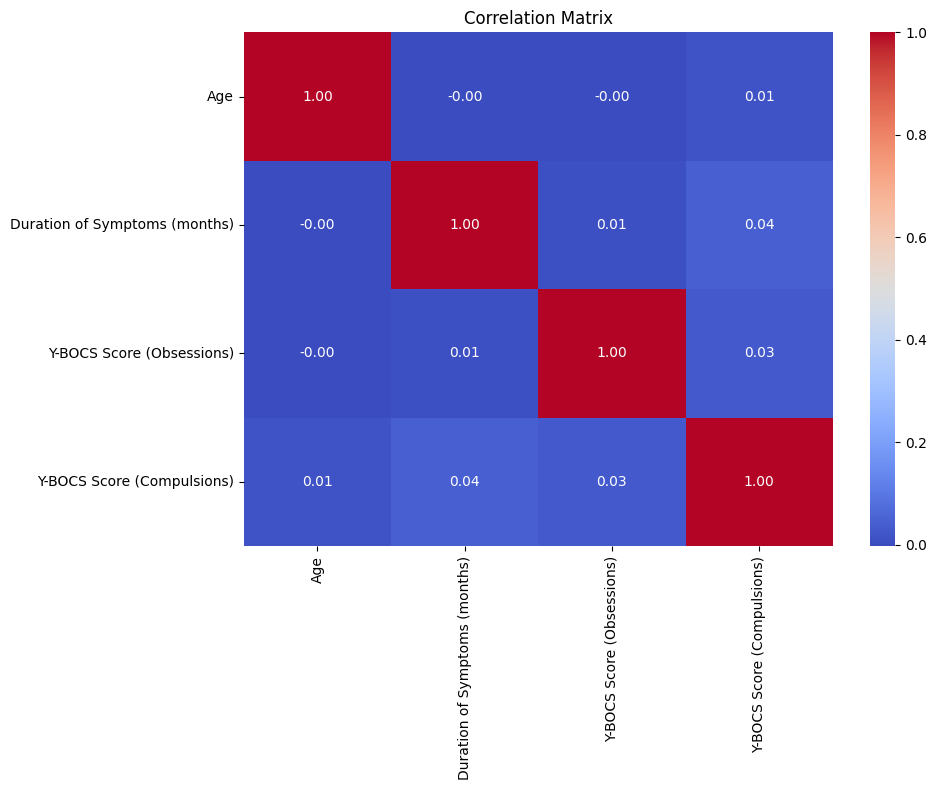

In [73]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()




Handling missing values...
  - Filled 0 missing values in Previous Diagnoses with 'MDD'


  - Dropped 386 rows with missing Medications values for modeling


<ipython-input-114-fde0c287d8f7>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Compulsion Type"] = train["Compulsion Type"].replace({'Checking': 1, 'Washing': 2,
<ipython-input-114-fde0c287d8f7>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["Depression Diagnosis"] = train["Depression Diagnosis"].replace({'No': 1, 'Yes': 2})
<ipython-input-114-fde0c287d8f7>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `res

TypeError: '<' not supported between instances of 'float' and 'str'

Non-numeric columns: ['OCD Diagnosis Date', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Depression Diagnosis', 'Anxiety Diagnosis']


Columns in X:
['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'Duration of Symptoms (months)', 'Previous Diagnoses', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']


KeyError: 'DiagnosisDate'